## Задание 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
!wget 'https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1' -O hr.csv

--2024-01-19 10:55:12--  https://drive.google.com/uc?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1
Resolving drive.google.com (drive.google.com)... 108.177.12.100, 108.177.12.138, 108.177.12.139, ...
Connecting to drive.google.com (drive.google.com)|108.177.12.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1 [following]
--2024-01-19 10:55:12--  https://drive.usercontent.google.com/download?id=1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.196.132, 2607:f8b0:400c:c36::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.196.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 566783 (553K) [application/octet-stream]
Saving to: ‘hr.csv’

hr.csv              100%[===================>] 553.50K  --.-KB/s    in 0.004s  

2024-01-19 10:55:12 (132 MB/s) - ‘hr.csv

In [3]:
hr = pd.read_csv('hr.csv')
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Задание 2

In [4]:
basic_stats = hr.describe()
mode_values = hr.mode().iloc[0]
basic_stats.loc['mode'] = mode_values
basic_stats

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000
mode,0.100000,0.550000,4.000000,135.000000,3.000000,0.000000,0.000000,0.000000


# Задание 3

<ipython-input-5-d6f402f4266e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_hr = hr.corr()


Две самые скоррелированные переменные: satisfaction_level - satisfaction_level и number_project - average_montly_hours
Две наименее скоррелированные переменные: satisfaction_level - number_project и left - Work_accident


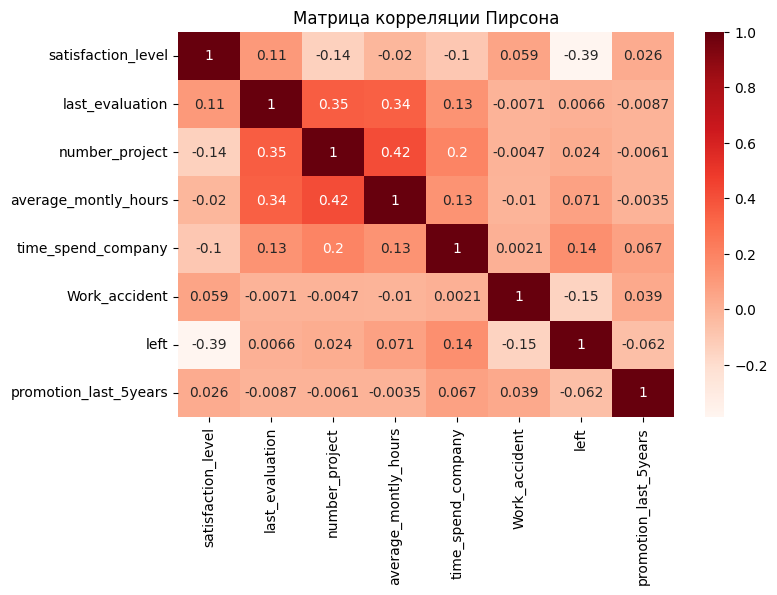

In [5]:
corr_hr = hr.corr()
max_corr = corr_hr.unstack().sort_values(ascending=False).drop_duplicates()
most_corr_variables = max_corr[:2].index.tolist()
least_corr_variables = max_corr[-3:-1].index.tolist()
plt.figure(figsize=[8, 5])
sns.heatmap(corr_hr, annot=True, cmap='Reds')
print(f"Две самые скоррелированные переменные: {most_corr_variables[0][0]} - {most_corr_variables[0][1]} и {most_corr_variables[1][0]} - {most_corr_variables[1][1]}\n"\
  f"Две наименее скоррелированные переменные: {least_corr_variables[0][0]} - {least_corr_variables[0][1]} и {least_corr_variables[1][0]} - {least_corr_variables[1][1]}")
plt.title(f"Матрица корреляции Пирсона")
plt.show()

# Задание 4

<ipython-input-81-b5975fa0b6ff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=hr, x="department", palette='viridis')


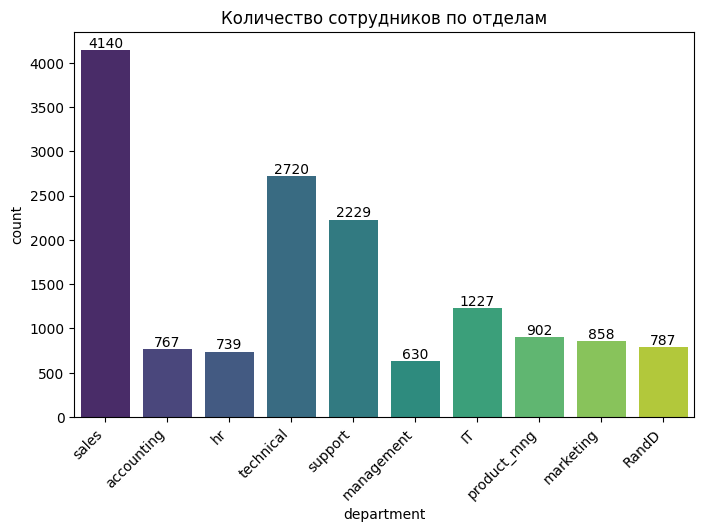

In [81]:
plt.figure(figsize=[8,5])
ax = sns.countplot(data=hr, x="department", palette='viridis')
plt.title("Количество сотрудников по отделам")
plt.xticks(rotation=45, ha='right')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 30), ha='center', va='baseline')

plt.show()

# Задание 5

<ipython-input-80-43f8674b4b20>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='salary', data=hr, palette='viridis')


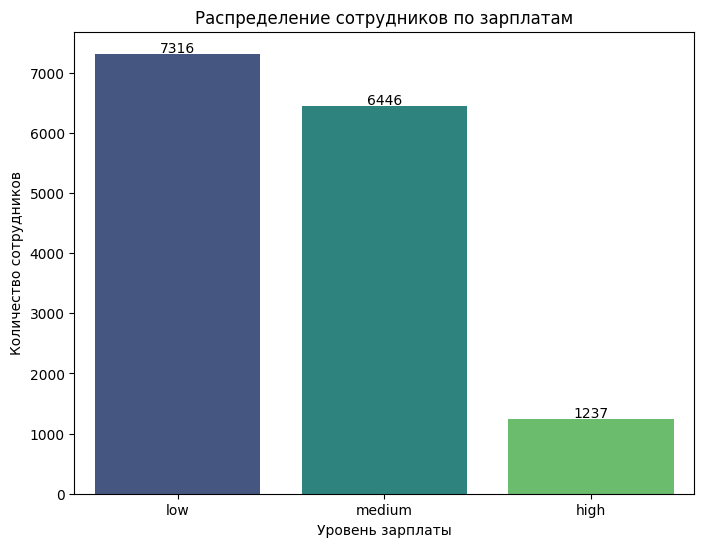

In [80]:
salary_distribution = hr['salary'].value_counts()

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='salary', data=hr, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height() + 30), ha='center', va='baseline')
plt.title('Распределение сотрудников по зарплатам')
plt.xlabel('Уровень зарплаты')
plt.ylabel('Количество сотрудников')
plt.show()

# Задание 6

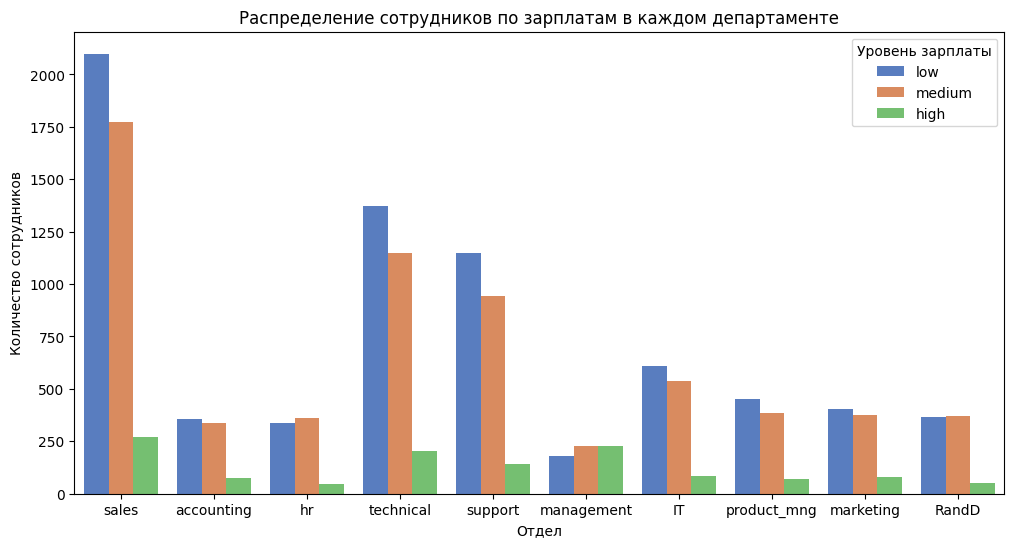

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(x='department', hue='salary', data=hr, palette='muted')
plt.title('Распределение сотрудников по зарплатам в каждом департаменте')
plt.xlabel('Отдел')
plt.ylabel('Количество сотрудников')
plt.legend(title='Уровень зарплаты')
plt.show()

# Задание 7

In [20]:
high_salary_hours = hr[hr['salary'] == 'high']['average_montly_hours']
low_salary_hours = hr[hr['salary'] == 'low']['average_montly_hours']

from scipy.stats import ttest_ind

p_value = ttest_ind(high_salary_hours, low_salary_hours).pvalue
hypothesis_result = "отвергаем" if p_value < 0.05 else "принимаем"
print(f'Гипотезу {hypothesis_result}')

Гипотезу принимаем


# Задание 8

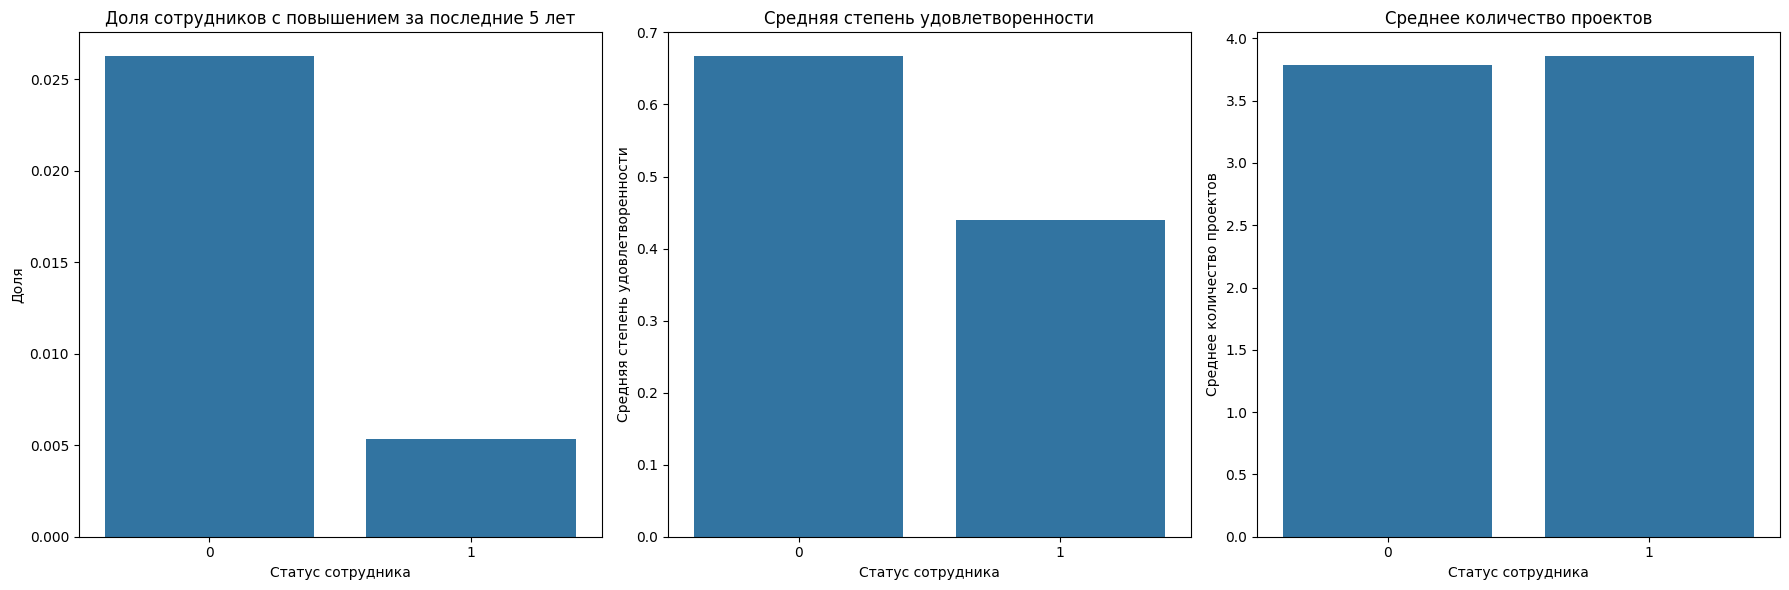

In [83]:
left_stats = hr.groupby('left').agg({
    'promotion_last_5years': 'mean',
    'satisfaction_level': 'mean',
    'number_project': 'mean'
})
left_stats
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.barplot(x='left', y='promotion_last_5years', data=left_stats, ax=axes[0])
axes[0].set_title('Доля сотрудников с повышением за последние 5 лет')
axes[0].set_xlabel('Статус сотрудника')
axes[0].set_ylabel('Доля')

sns.barplot(x='left', y='satisfaction_level', data=left_stats, ax=axes[1])
axes[1].set_title('Средняя степень удовлетворенности')
axes[1].set_xlabel('Статус сотрудника')
axes[1].set_ylabel('Средняя степень удовлетворенности')

sns.barplot(x='left', y='number_project', data=left_stats, ax=axes[2])
axes[2].set_title('Среднее количество проектов')
axes[2].set_xlabel('Статус сотрудника')
axes[2].set_ylabel('Среднее количество проектов')

plt.tight_layout()
plt.show()

# Задание 9

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X = hr.drop(['left', 'department', 'salary'], axis=1)
y = hr['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.7557777777777778


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def print_all_metrics(y_true, y_pred, title = 'Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))

print_all_metrics(y_test, lr_predictions, title='Метрики для модели логистической регрессии:')

Метрики для модели логистической регрессии:
	Accuracy: 0.76
	Precision: 0.48
	Recall: 0.25
	F1: 0.32


In [ ]:
'''
  Accuracy: Модель правильно классифицировала 76% сотрудников на тестовой выборке.
Это общая метрика правильности предсказаний, но ее использование может быть ограничено, особенно в случае несбалансированных классов.

  Precision: Из всех предсказанных моделью увольнений, 49% действительно уволились.
Это отражает способность модели избегать ложных положительных предсказаний (то есть предсказаний увольнения, когда сотрудник остается).

  Recall (Полнота): Модель смогла выявить только 25% всех увольнений.
Это измеряет способность модели обнаруживать все действительные случаи увольнения.

  F1-мера: Комбинирует precision и recall в единую метрику.
Значение F1 равно 0.32, что может быть интерпретировано как сбалансированное сочетание точности и полноты.

  Модель сделел больше ошибок (567), что сотрудник останется, а он уволился.

  Выводы: Модель имеет высокую точность, что может быть полезно в предсказании увольнений.
  Однако, полнота модели (способность обнаруживать увольнения) низкая, что может означать,
что она упускает значительное количество фактических увольнений.
  F1-мера дает баланс между точностью и полнотой и может быть использована для общей оценки качества модели
'''